# Naive Bayes for Numeric Data 

## Import Library 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

## Read & Data Understanding  

In [2]:
df = pd.read_csv('iris.data.csv', names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
df.head()   

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset Understanding   

In [3]:
print("Sample Amount:", df.shape[0])
print("Number of Features:", df.shape[1] - 1) # Subtracts one because the last column is the target class
print("Existing Target Class:", df['class'].unique())   

Sample Amount: 150
Number of Features: 4
Existing Target Class: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
print('Information:')
df.info()    

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
 df.isnull().sum() #no. of null values in each coloumn   

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [6]:
#Checking for duplicates 
value=len(df[df.duplicated()])
print(value)    

3


## Preprocessing  

In [7]:
df = df.drop_duplicates()   

In [8]:
#Handling Categorical Variables
df['class'] = df['class'].astype('category').cat.codes   

In [9]:
#data normalization
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  

## EDA 

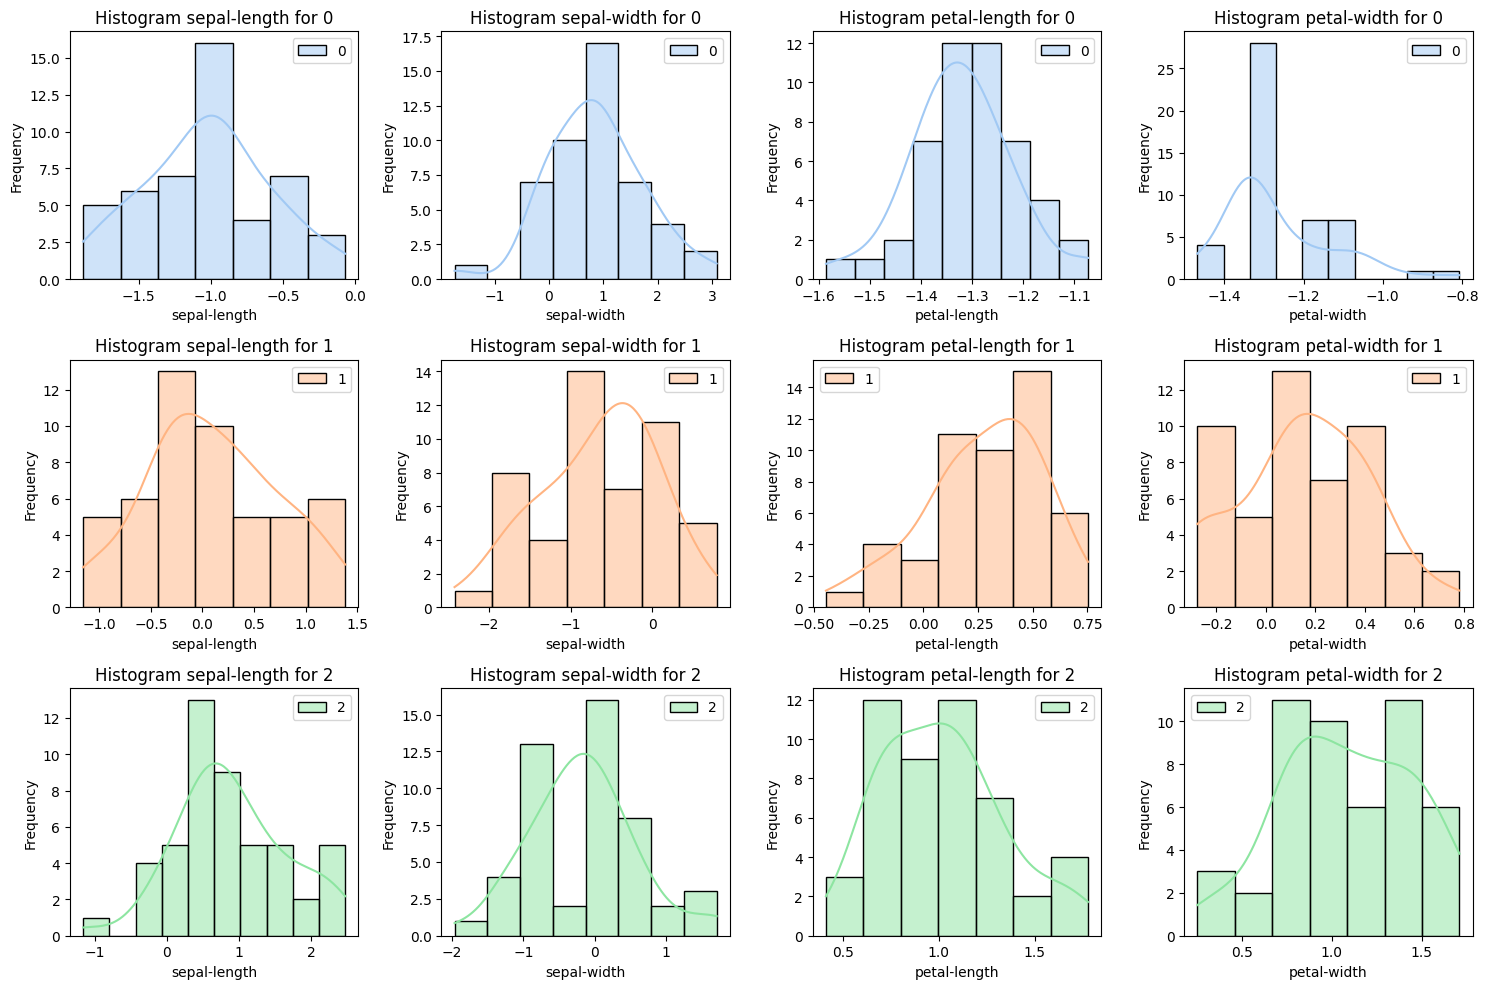

In [10]:
# Split the dataset based on class
class_names = df['class'].unique()

# Set pastel color palette
pastel_palette = sns.color_palette("pastel", len(class_names))

# Create subplots
fig, axes = plt.subplots(nrows=len(class_names), ncols=df.shape[1]-1, figsize=(15, 10))

# Perform histogram plots for each class and each feature
for i, class_name in enumerate(class_names):
     class_data = df[df['class'] == class_name]
    
     for j, feature in enumerate(df.columns[:-1]):
         sns.histplot(class_data[feature], kde=True, ax=axes[i, j], label=class_name, color=pastel_palette[i])
         axes[i, j].set_title(f'Histogram {feature} for {class_name}')
         axes[i, j].set_xlabel(feature)
         axes[i, j].set_ylabel('Frequency')
         axes[i, j].legend()

# Customize subplot layout
plt.tight_layout()
plt.show()  

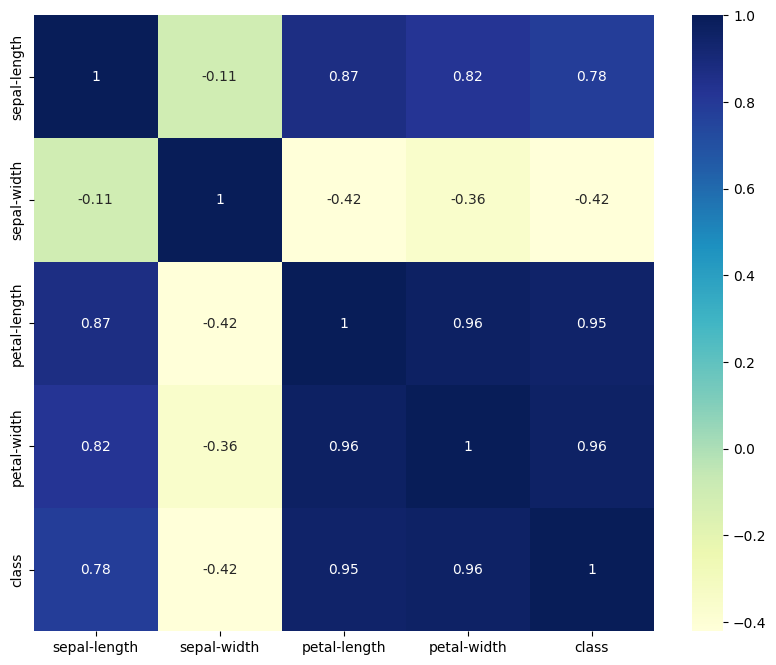

In [11]:
# Plot Heatmap untuk melihat korelasi antar variabel
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()   

In [12]:
# Menampilkan hasil korelasi
print("Matrix Korelasi:")
print(correlation_matrix)  

Matrix Korelasi:
              sepal-length  sepal-width  petal-length  petal-width     class
sepal-length      1.000000    -0.109321      0.871305     0.817058  0.782904
sepal-width      -0.109321     1.000000     -0.421057    -0.356376 -0.418348
petal-length      0.871305    -0.421057      1.000000     0.961883  0.948339
petal-width       0.817058    -0.356376      0.961883     1.000000  0.955693
class             0.782904    -0.418348      0.948339     0.955693  1.000000


In conclusion, the petal-length and petal-width variables tend to have a stronger correlation with the class variables compared to the sepal-length and sepal-width variables. This could indicate that the length and width of the petals are more informative in distinguishing classes compared to the length and width of the sepals. 

## Modelling 

### without feature selection 

In [13]:
# Split data (80:20)
X = df.iloc[:, :-1]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [14]:
# Gaussian Naive Bayes model without feature selection
model_without_fs = GaussianNB()
model_without_fs.fit(X_train, y_train)
y_pred_without_fs = model_without_fs.predict(X_test) 

In [15]:
# Evaluate the model without feature selection
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
print("Gaussian Naive Bayes accuracy without Feature Selection:", accuracy_without_fs) 

Gaussian Naive Bayes accuracy without Feature Selection: 0.9666666666666667


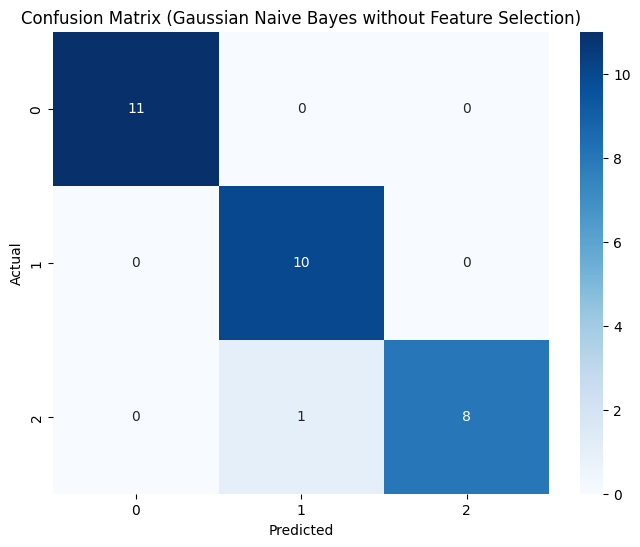

In [18]:
# Calculate and display the Confusion Matrix without feature selection
conf_matrix_without_fs = confusion_matrix(y_test, y_pred_without_fs)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_without_fs, annot=True, fmt='d', cmap="Blues", xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.title('Confusion Matrix (Gaussian Naive Bayes without Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 